<a href="https://colab.research.google.com/github/inesmurtagh/analisis-predictivo/blob/main/Modelo%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#82.05 - Analisis Predictivo 
**Segundo Examen**

Inés Murtagh

+ [Leaderboard](https://www.kaggle.com/competitions/ap-tp2-2q2022/leaderboard) 
+ **Modelo utilizado:** Extra Tree Regressor

## Importación del Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive', force_remount=True)
with open("/content/drive/My Drive/kaggle.json", 'r') as f:
    api_token= json.load(f)

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c ap-tp2-2q2022


import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Mounted at /content/drive
ap-tp2-2q2022.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
origen = pd.read_csv("origen.csv", sep=",")
test = pd.read_csv("testear.csv", sep=",")

##Análisis de variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *  

In [ ]:
origen['release_date'] = pd.to_datetime(origen['release_date'])
test['release_date'] = pd.to_datetime(test['release_date'])

In [ ]:
origen['Longevity'] = 2022 - origen['startYear']
origen['Longevity'] = np.where(origen['Longevity'] == 2022, 0, origen['Longevity'])

# cambios en testeo
test['Longevity'] = 2022 - test['startYear']
test['Longevity'] = np.where(test['Longevity'] == 2022, 0, test['Longevity'])

**Cambiar valores 0 o nulos**

*   Tratamiento de nulos

In [ ]:
# Variables categóricas
origen['status'].fillna('Unknown', inplace = True) 
origen['genres_x'].fillna('Other', inplace = True) 
origen['overview'].fillna('No overview found.', inplace = True) 
origen['attributes'].fillna('Other', inplace = True) 

test['status'].fillna('Unknown', inplace = True) 
test['genres_x'].fillna('Other', inplace = True) 
test['overview'].fillna('No overview found.', inplace = True) 
test['attributes'].fillna('Other', inplace = True) 

In [ ]:
# Variables numéricas
origen['budget'] = origen['budget'].astype(int, errors = 'ignore')
origen['revenue'] = origen['revenue'].astype(int, errors = 'ignore')
origen['popularity'] = origen['popularity'].astype(int, errors = 'ignore')

test['budget'] = test['budget'].astype(int, errors = 'ignore')
test['revenue'] = test['revenue'].astype(int, errors = 'ignore')
test['popularity'] = test['popularity'].astype(int, errors = 'ignore')

Reemplazar nulos por la mediana (por año de filmación)

In [ ]:
origen['revenue'] = np.where(origen['revenue'] == 0, None, origen['revenue'])
origen['budget'] = np.where(origen['budget'] == 0, None, origen['budget'])
origen['popularity'] = np.where(origen['popularity'] == 0, None, origen['popularity'])

presupuesto = origen.groupby(['startYear','titleType'])[['budget']].median()
ingresos = origen.groupby(['startYear','titleType'])[['revenue']].median()
popularidad = origen.groupby(['startYear','titleType'])[['popularity']].median()

origen = origen.merge(presupuesto, on=['startYear', 'titleType'], how='left')
origen = origen.merge(ingresos, on=['startYear', 'titleType'], how='left')
origen = origen.merge(popularidad, on=['startYear', 'titleType'], how='left')

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [ ]:
origen['budget_y'] = np.where(origen['budget_y'].isnull(), 0, origen['budget_y'])
origen['revenue_y'] = np.where(origen['revenue_y'].isnull(), 0, origen['revenue_y'])
origen['popularity_y'] = np.where(origen['popularity_y'].isnull(), 0, origen['popularity_y'])

origen['budget_x'] = np.where(origen['budget_x'].isnull(), origen['budget_y'], 0)
origen['revenue_x'] = np.where(origen['revenue_x'].isnull(), origen['revenue_y'], 0)
origen['popularity_x'] = np.where(origen['popularity_x'].isnull(), origen['popularity_y'], 0)

origen = origen.rename(columns={'budget_x': 'budget'})
origen = origen.rename(columns={'revenue_x': 'revenue'})
origen = origen.rename(columns={'popularity_x': 'popularity'})

In [ ]:
test['revenue'] = np.where(test['revenue'] == 0, None, test['revenue'])
test['budget'] = np.where(test['budget'] == 0, None, test['budget'])
test['popularity'] = np.where(test['popularity'] == 0, None, test['popularity'])

presupuesto = test.groupby(['startYear','titleType'])[['budget']].median()
ingresos = test.groupby(['startYear','titleType'])[['revenue']].median()
popularidad = test.groupby(['startYear','titleType'])[['popularity']].median()

test = test.merge(presupuesto, on=['startYear', 'titleType'], how='left')
test = test.merge(ingresos, on=['startYear', 'titleType'], how='left')
test = test.merge(popularidad, on=['startYear', 'titleType'], how='left')

test['budget_y'] = np.where(test['budget_y'].isnull(), 0, test['budget_y'])
test['revenue_y'] = np.where(test['revenue_y'].isnull(), 0, test['revenue_y'])
test['popularity_y'] = np.where(test['popularity_y'].isnull(), 0, test['popularity_y'])

test['budget_x'] = np.where(test['budget_x'].isnull(), test['budget_y'], 0)
test['revenue_x'] = np.where(test['revenue_x'].isnull(), test['revenue_y'], 0)
test['popularity_x'] = np.where(test['popularity_x'].isnull(), test['popularity_y'], 0)

test = test.rename(columns={'budget_x': 'budget'})
test = test.rename(columns={'revenue_x': 'revenue'})
test = test.rename(columns={'popularity_x': 'popularity'})

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

*   Reemplazo de ceros

In [ ]:
origen.genres_x = origen.genres_x.replace({"0": "Other"})
origen.attributes = origen.attributes.replace({"0": "Other"})

origen['isOriginalTitle'] = np.where(origen['isOriginalTitle']>0, 1, 0)

# test
test.genres_x = test.genres_x.replace({"0": "Other"})
test.attributes = test.attributes.replace({"0": "Other"})

test['isOriginalTitle'] = np.where(test['isOriginalTitle']>0, 1, 0)

**Creación de nuevas variables**

*   Adult

In [ ]:
# creo una nueva variable para saber si es adulto o no
# la columna esta formada a partir de las variables 'isAdult' y 'adult'
origen['isAdult'] = origen['isAdult'].astype(int, errors = 'ignore')
origen['Adult'] = np.where(origen['isAdult']==1, 1, np.where(origen['adult']==True , 1, 0))

# eliminar las columans 'isAdult' y 'adult'
origen.drop(['isAdult'], axis=1, inplace=True)
origen.drop(['adult'], axis=1, inplace=True)

In [ ]:
test['isAdult'] = test['isAdult'].astype(int, errors = 'ignore')
test['Adult'] = np.where(test['isAdult']==1, 1, np.where(test['adult']==True , 1, 0))

test.drop(['isAdult'], axis=1, inplace=True)
test.drop(['adult'], axis=1, inplace=True)

*   Contar directores, escritores:


In [ ]:
# crear la columna n_directors que cuentan la cantidad de directores
origen['n_directors'] = np.where(origen['directors']=='0', 0, origen['directors'].str.count(',') + 1)

# crear la columnas n_writers que cuentan la cantidad de escritores
origen['n_writers'] = np.where(origen['writers']=='0', 0, origen['writers'].str.count(',') + 1)

# reemplazar el valor 0 por 'Unknown'
origen.directors = origen.directors.replace({"0": "Unknown"})
origen.writers = origen.writers.replace({"0": "Unknown"})

In [ ]:
test['n_directors'] = np.where(test['directors']=='0', 0, test['directors'].str.count(',') + 1)
test['n_writers'] = np.where(test['writers']=='0', 0, test['writers'].str.count(',') + 1)

test.directors = test.directors.replace({"0": "Unknown"})
test.writers = test.writers.replace({"0": "Unknown"})

*   Buena puntuacion

para aquellos que hayan tenido un numero de votos mayor al promedio

In [ ]:
promedio = origen['numVotes'].mean()
origen['maxVotes'] = np.where((origen['numVotes'] > promedio) , 1, 0)

promedio = test['numVotes'].mean()
test['maxVotes'] = np.where((test['numVotes'] > promedio) , 1, 0)

**Encoding**

- Title Type

In [ ]:
origen = origen.drop(columns=['video'])
test = test.drop(columns=['video'])

In [ ]:
origen['titleType'] = np.where((origen['titleType'] == 'tvSeries') | (origen['titleType'] == 'tvMiniSeries'), 'Series', 
                    np.where((origen['titleType'] == 'tvMovie') | (origen['titleType'] == 'movie'), 'Movie',
                    np.where((origen['titleType'] == 'tvShort') | (origen['titleType'] == 'short') | (origen['titleType'] == 'video'), 'Short', origen['titleType'])))

test['titleType'] = np.where((test['titleType'] == 'tvSeries') | (test['titleType'] == 'tvMiniSeries'), 'Series', 
                    np.where((test['titleType'] == 'tvMovie') | (test['titleType'] == 'movie'), 'Movie',
                    np.where((test['titleType'] == 'tvShort') | (test['titleType'] == 'short') | (test['titleType'] == 'video'), 'Short', test['titleType'])))

In [ ]:
# Creamos las variables binarias
dummies = pd.get_dummies(origen['titleType'])

# Añadimos las variables binarias al DataFrame
origen = pd.concat([origen, dummies], axis = 1)

# Eliminamos la vairable original race
origen = origen.drop(columns=['titleType'])

In [ ]:
dummies_test = pd.get_dummies(test['titleType'])
test = pd.concat([test, dummies_test], axis = 1)
test = test.drop(columns=['titleType'])

- Genres

In [ ]:
# Creamos las variables binarias
dummies = origen['genres_x'].str.get_dummies(sep=',')
dummies_test = test['genres_x'].str.get_dummies(sep=',')

In [ ]:
# Estos 10 géneros son los que mejor rating y votos tienen, por lo tanto, se trabajará unicamente con estos para el armado del modelo
dummies = dummies[['Documentary', 'Mystery', 'Crime', 'Animation', 'Adventure', 'Family', 'Drama']]
dummies['Documentary'] = dummies['Documentary'].astype(int)
dummies['Mystery'] = dummies['Mystery'].astype(int)
dummies['Crime'] = dummies['Crime'].astype(int)
dummies['Animation'] = dummies['Animation'].astype(int)
dummies['Adventure'] = dummies['Adventure'].astype(int)
dummies['Family'] = dummies['Family'].astype(int)
dummies['Drama'] = dummies['Drama'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
# Añadimos las variables binarias al DataFrame
origen = pd.concat([origen, dummies], axis = 1)

# Eliminamos la vairable original race
origen = origen.drop(columns=['genres_x'])

In [ ]:
# para testeo
dummies_test = dummies_test[['Documentary', 'Mystery', 'Crime', 'Animation', 'Adventure', 'Family', 'Drama']]
dummies_test['Documentary'] = dummies_test['Documentary'].astype(int)
dummies_test['Mystery'] = dummies_test['Mystery'].astype(int)
dummies_test['Crime'] = dummies_test['Crime'].astype(int)
dummies_test['Animation'] = dummies_test['Animation'].astype(int)
dummies_test['Adventure'] = dummies_test['Adventure'].astype(int)
dummies_test['Family'] = dummies_test['Family'].astype(int)
dummies_test['Drama'] = dummies_test['Drama'].astype(int)

# Añadimos las variables binarias al DataFrame
test = pd.concat([test, dummies_test], axis = 1)
test = test.drop(columns=['genres_x'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

### Tratamiento de outliers

In [ ]:
# remuevo el valor minutes negativo --> inconsistencia
# no tiene sentido que hayan minutos negativos
origen = origen.drop(origen[origen['runtimeMinutes']<0].index)

In [ ]:
origen = origen.drop(origen[origen['seasonNumber']>1750].index)

In [ ]:
origen['startYear'] = np.where(origen['startYear']<1895, 1895, origen['startYear'])

# Modelo

**Particion**

In [ ]:
from sklearn.model_selection import train_test_split

columnas = ['numVotes', 'runtimeMinutes', 'Longevity', 'budget', 'popularity', 'revenue', 'maxVotes', 'Adult', 'n_directors', 'n_writers', 'Movie', 'Series', 'Short', 'tvEpisode', 'Documentary', 'Mystery', 'Crime', 'Animation', 'Adventure', 'Family', 'Drama']
X = origen[columnas]
y = origen['averageRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

## *ExtraTree*

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
extra = ExtraTreesRegressor(max_depth= 29, min_samples_split=12, n_estimators=500, bootstrap=True) 
extra.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=True, max_depth=29, min_samples_split=12,
                    n_estimators=500)

In [ ]:
extra.score(X_test,y_test)

0.3963478588194783

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score


k_folds = KFold(n_splits=5)

scores = cross_val_score(extra, X, y, cv = k_folds)
print ("Cross Validation Scores: ", scores)
print ("Average CV Score: ", scores.mean())
print ("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.39733526 0.3952112  0.39572818 0.39604252 0.39395425]
Average CV Score:  0.3956542832337255
Number of CV Scores used in Average:  5


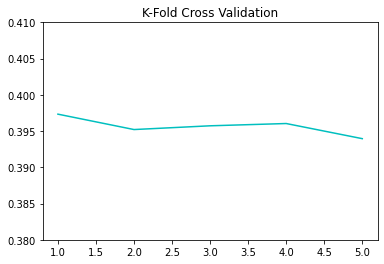

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.38, 0.41)
plt.show()

# Solution file
generar solution file para subir a kaggle

In [ ]:
resultado = extra.predict(test[columnas])

salida = pd.DataFrame(data={"averageRating": resultado}).astype(str)
salida.index = test.Id
salida.to_csv("extratreesr.csv", sep=',',index=True,  index_label='Id')